## Descripción del dataset
#### Proveedor: 
Kaggle

https://www.kaggle.com/gpreda/covid-world-vaccination-progress


## Librerias a importar
#### Libreria pandas
Librería de Python especializada en el manejo y análisis de estructuras de datos. Permite leer y escribir fácilmente ficheros en formato CSV, Excel y bases de datos SQL. ... Permite acceder a los datos mediante índices o nombres para filas y columnas.

#### Libreria numpy
NumPy es una biblioteca para el lenguaje de programación Python que da soporte para crear vectores y matrices grandes multidimensionales, junto con una gran colección de funciones matemáticas de alto nivel para operar con ellas.

#### Libreria datetime
El módulo datetime proporciona clases para manipular fechas y horas.

#### Libreria de visualizacion seaborn
Seaborn es una biblioteca de visualización de datos de Python basada en matplotlib. Proporciona una interfaz de alto nivel para elaborar gráficos estadísticos e informativos.


In [58]:
# Importar librerias
import pandas as pd
import numpy as np
import csv
from datetime import datetime
import seaborn as sb
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import plotly.express as px
import plotly.graph_objects as go
import matplotlib





In [59]:
data = pd.read_csv('data/country_vaccinations.csv', sep=','); #Lectura del csv

In [60]:
data.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/


In [61]:
# Presentar los nombres de las columnas
print(data.keys()) 

Index(['country', 'iso_code', 'date', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated',
       'daily_vaccinations_raw', 'daily_vaccinations',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'daily_vaccinations_per_million',
       'vaccines', 'source_name', 'source_website'],
      dtype='object')


In [62]:
# Presentar la informacion de cada variable
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19116 entries, 0 to 19115
Data columns (total 15 columns):
country                                19116 non-null object
iso_code                               19116 non-null object
date                                   19116 non-null object
total_vaccinations                     10938 non-null float64
people_vaccinated                      10197 non-null float64
people_fully_vaccinated                7801 non-null float64
daily_vaccinations_raw                 9117 non-null float64
daily_vaccinations                     18903 non-null float64
total_vaccinations_per_hundred         10938 non-null float64
people_vaccinated_per_hundred          10197 non-null float64
people_fully_vaccinated_per_hundred    7801 non-null float64
daily_vaccinations_per_million         18903 non-null float64
vaccines                               19116 non-null object
source_name                            19116 non-null object
source_website                 

In [63]:
# Conversión a formato de fecha
data['date'] = pd.Series([datetime.strptime(d, "%Y-%m-%d") for d in data["date"]])

In [64]:
# Información de la data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19116 entries, 0 to 19115
Data columns (total 15 columns):
country                                19116 non-null object
iso_code                               19116 non-null object
date                                   19116 non-null datetime64[ns]
total_vaccinations                     10938 non-null float64
people_vaccinated                      10197 non-null float64
people_fully_vaccinated                7801 non-null float64
daily_vaccinations_raw                 9117 non-null float64
daily_vaccinations                     18903 non-null float64
total_vaccinations_per_hundred         10938 non-null float64
people_vaccinated_per_hundred          10197 non-null float64
people_fully_vaccinated_per_hundred    7801 non-null float64
daily_vaccinations_per_million         18903 non-null float64
vaccines                               19116 non-null object
source_name                            19116 non-null object
source_website         

In [65]:
# Presentar unicamente los paises
paises = data['country'].unique()
print(paises)

['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola' 'Anguilla'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan' 'Bolivia'
 'Bonaire Sint Eustatius and Saba' 'Bosnia and Herzegovina' 'Botswana'
 'Brazil' 'Brunei' 'Bulgaria' 'Cambodia' 'Cameroon' 'Canada' 'Cape Verde'
 'Cayman Islands' 'Central African Republic' 'Chile' 'China' 'Colombia'
 'Comoros' 'Congo' 'Costa Rica' "Cote d'Ivoire" 'Croatia' 'Cuba' 'Curacao'
 'Cyprus' 'Czechia' 'Democratic Republic of Congo' 'Denmark' 'Djibouti'
 'Dominica' 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'England'
 'Equatorial Guinea' 'Estonia' 'Eswatini' 'Ethiopia' 'Faeroe Islands'
 'Falkland Islands' 'Fiji' 'Finland' 'France' 'French Polynesia' 'Gabon'
 'Gambia' 'Georgia' 'Germany' 'Ghana' 'Gibraltar' 'Greece' 'Greenland'
 'Grenada' 'Guatemala' 'Guernsey' 'Guinea' 'Guinea-Bissau' 'Guyana'
 'Honduras' 'H

In [66]:
# Conteo de paises
paises = data['country'].unique()
len(paises)

211

In [67]:
data['total_vaccinations'].fillna(np.nan, inplace=True) #Función par reemplazar los datos nulos por NaN

In [68]:
data['people_vaccinated'].fillna(np.nan, inplace=True) #Función par reemplazar los datos nulos por NaN

In [69]:
data['people_fully_vaccinated'].fillna(np.nan, inplace=True) #Función par reemplazar los datos nulos por NaN

In [70]:
data['daily_vaccinations_raw'].fillna(np.nan, inplace=True) #Función par reemplazar los datos nulos por NaN

In [71]:
data['daily_vaccinations'].fillna(np.nan, inplace=True) #Función par reemplazar los datos nulos por NaN

In [72]:
data.head(100) #Mostrar los primeros 100 datos para combrobar el cambio de los datos nulos

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Albania,ALB,2021-01-26,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN,3.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, ...",Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
96,Albania,ALB,2021-01-27,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,1.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, ...",Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
97,Albania,ALB,2021-01-28,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, ...",Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
98,Albania,ALB,2021-01-29,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, ...",Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...


In [73]:
# Eliminación de columnas innecesarias
data = data.drop(['iso_code', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'daily_vaccinations_per_million', 'source_website'], axis=1)

In [74]:
#Tipos de datos
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19116 entries, 0 to 19115
Data columns (total 9 columns):
country                    19116 non-null object
date                       19116 non-null datetime64[ns]
total_vaccinations         10938 non-null float64
people_vaccinated          10197 non-null float64
people_fully_vaccinated    7801 non-null float64
daily_vaccinations_raw     9117 non-null float64
daily_vaccinations         18903 non-null float64
vaccines                   19116 non-null object
source_name                19116 non-null object
dtypes: datetime64[ns](1), float64(5), object(3)
memory usage: 1.1+ MB


In [75]:
paisesEc = data['country'] == 'Ecuador'  #Filtrado de la columna Ecuador
print (paisesEc)

0        False
1        False
2        False
3        False
4        False
         ...  
19111    False
19112    False
19113    False
19114    False
19115    False
Name: country, Length: 19116, dtype: bool


In [76]:
dataEc = data[paisesEc] #Generar un nuevo DataFrame 
dataEc.head()

,country,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,vaccines,source_name
4754,Ecuador,2021-01-21,0.0,0.0,NaN,NaN,NaN,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac",Government of Ecuador via Ecuacovid
4755,Ecuador,2021-01-22,108.0,108.0,NaN,108.0,108.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac",Government of Ecuador via Ecuacovid
4756,Ecuador,2021-01-23,NaN,NaN,NaN,NaN,341.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac",Government of Ecuador via Ecuacovid
4757,Ecuador,2021-01-24,NaN,NaN,NaN,NaN,419.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac",Government of Ecuador via Ecuacovid
4758,Ecuador,2021-01-25,NaN,NaN,NaN,NaN,458.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac",Government of Ecuador via Ecuacovid


In [77]:
dataEc

,country,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,vaccines,source_name
4754,Ecuador,2021-01-21,0.0,0.0,NaN,NaN,NaN,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac",Government of Ecuador via Ecuacovid
4755,Ecuador,2021-01-22,108.0,108.0,NaN,108.0,108.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac",Government of Ecuador via Ecuacovid
4756,Ecuador,2021-01-23,NaN,NaN,NaN,NaN,341.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac",Government of Ecuador via Ecuacovid
4757,Ecuador,2021-01-24,NaN,NaN,NaN,NaN,419.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac",Government of Ecuador via Ecuacovid
4758,Ecuador,2021-01-25,NaN,NaN,NaN,NaN,458.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac",Government of Ecuador via Ecuacovid
...,...,...,...,...,...,...,...,...,...
4867,Ecuador,2021-05-14,1456293.0,1138269.0,318024.0,50395.0,30067.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac",Government of Ecuador via Ecuacovid
4868,Ecuador,2021-05-15,1485936.0,1152298.0,333638.0,29643.0,31149.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac",Government of Ecuador via Ecuacovid
4869,Ecuador,2021-05-16,1524724.0,1179062.0,345662.0,38788.0,33537.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac",Government of Ecuador via Ecuacovid
4870,Ecuador,2021-05-17,1560453.0,1203517.0,356936.0,35729.0,35125.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac",Government of Ecuador via Ecuacovid


In [78]:
dataEc.describe()  #Resumen general de todo el dataFrame de datos

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations
count,5.800000e+01,5.800000e+01,54.000000,37.000000,117.000000
mean,6.081742e+05,4.613866e+05,157660.703704,28656.891892,12673.076923
std,5.056232e+05,3.930033e+05,112071.652875,16510.853538,13411.195455
min,0.000000e+00,0.000000e+00,1962.000000,108.000000,108.000000
25%,1.506358e+05,1.259818e+05,43579.000000,16502.000000,1084.000000
50%,5.296415e+05,3.656090e+05,173058.000000,29643.000000,8583.000000
75%,1.024458e+06,7.808718e+05,245377.000000,38788.000000,19984.000000
max,1.583399e+06,1.203778e+06,379621.000000,66587.000000,48411.000000


# Medidas de tendencia central
 
Las medidas de tendencia central son medidas estadísticas que pretenden resumir en un solo valor a un conjunto de valores. Representan un centro en torno al cual se encuentra ubicado el conjunto de los datos.

### Media
La media o el promedio se calcula mediante la suma de todos los datos dividido entre la cantidad de los mismos.

In [79]:
# Calcular media del total de vacunación
print(dataEc['total_vaccinations'].mean())


608174.1551724138


# Medidas de dispersión
Las medidas de dispersión tratan, a través del cálculo de diferentes fórmulas, de arrojar un valor numérico que ofrezca información sobre el grado de variabilidad de una variable.

### Varianza
La varianza es una medida de dispersión que representa la variabilidad de una serie de datos respecto a su media.

### Desviación estándar
Es una medida que se utiliza para cuantificar la variación o la dispersión de un conjunto de datos numéricos.



In [80]:
print("Varianza: ", dataEc['total_vaccinations'].var()) # varianza

print("Desviación estándar: ", dataEc['total_vaccinations'].std()) # desviación estándar

Varianza:  255654830940.4492
Desviación estándar:  505623.21044474334


## Análisis mes de Enero

In [81]:
# Filtrar los datos de las fechas del mes de Enero
filteredEnero = dataEc[dataEc["date"].isin(pd.date_range('2021-01-01', '2021-01-31'))]
filteredEnero

,country,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,vaccines,source_name
4754,Ecuador,2021-01-21,0.0,0.0,NaN,NaN,NaN,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac",Government of Ecuador via Ecuacovid
4755,Ecuador,2021-01-22,108.0,108.0,NaN,108.0,108.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac",Government of Ecuador via Ecuacovid
4756,Ecuador,2021-01-23,NaN,NaN,NaN,NaN,341.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac",Government of Ecuador via Ecuacovid
4757,Ecuador,2021-01-24,NaN,NaN,NaN,NaN,419.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac",Government of Ecuador via Ecuacovid
4758,Ecuador,2021-01-25,NaN,NaN,NaN,NaN,458.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac",Government of Ecuador via Ecuacovid
4759,Ecuador,2021-01-26,NaN,NaN,NaN,NaN,481.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac",Government of Ecuador via Ecuacovid
4760,Ecuador,2021-01-27,2982.0,2982.0,NaN,NaN,497.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac",Government of Ecuador via Ecuacovid
4761,Ecuador,2021-01-28,NaN,NaN,NaN,NaN,484.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac",Government of Ecuador via Ecuacovid
4762,Ecuador,2021-01-29,NaN,NaN,NaN,NaN,526.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac",Government of Ecuador via Ecuacovid
4763,Ecuador,2021-01-30,NaN,NaN,NaN,NaN,502.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac",Government of Ecuador via Ecuacovid


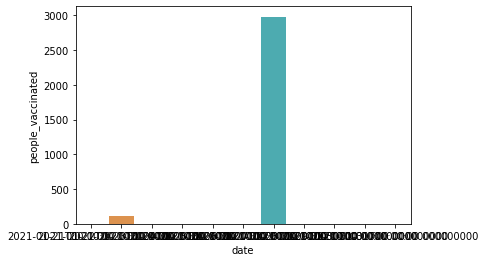

In [82]:
# ¿En que fechas del mes de Enero se puede observar un mayor numero de personas vacunadas?
ax = sns.barplot(x="date", y="people_vaccinated", data=filteredEnero) 

## Análisis mes de Mayo

In [83]:
# Filtrar los datos de las fechas del mes de mayo
filteredFec = dataEc[dataEc["date"].isin(pd.date_range('2021-05-01', '2021-05-20'))]
filteredFec

,country,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,vaccines,source_name
4854,Ecuador,2021-05-01,1036794.0,791822.0,244972.0,49342.0,43440.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac",Government of Ecuador via Ecuacovid
4855,Ecuador,2021-05-02,1067472.0,821960.0,245512.0,30678.0,46219.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac",Government of Ecuador via Ecuacovid
4856,Ecuador,2021-05-03,NaN,NaN,NaN,NaN,48411.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac",Government of Ecuador via Ecuacovid
4857,Ecuador,2021-05-04,1141262.0,889218.0,252044.0,NaN,46441.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac",Government of Ecuador via Ecuacovid
4858,Ecuador,2021-05-05,1182085.0,924539.0,257546.0,40823.0,45813.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac",Government of Ecuador via Ecuacovid
4859,Ecuador,2021-05-06,1215676.0,953238.0,262438.0,33591.0,42116.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac",Government of Ecuador via Ecuacovid
4860,Ecuador,2021-05-07,1245822.0,981620.0,264202.0,30146.0,36910.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac",Government of Ecuador via Ecuacovid
4861,Ecuador,2021-05-08,NaN,NaN,NaN,NaN,33014.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac",Government of Ecuador via Ecuacovid
4862,Ecuador,2021-05-09,1289962.0,1024121.0,265841.0,NaN,31784.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac",Government of Ecuador via Ecuacovid
4863,Ecuador,2021-05-10,NaN,NaN,NaN,NaN,30030.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac",Government of Ecuador via Ecuacovid


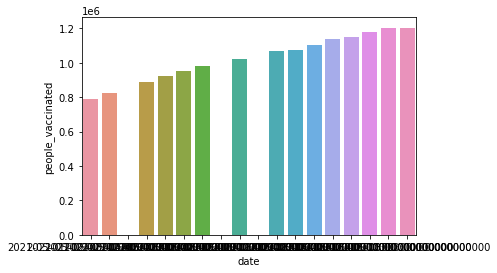

In [84]:
# ¿En que fechas del mes de mayo se puede observar un mayor numero de personas vacunadas?
ax = sns.barplot(x="date", y="people_vaccinated", data=filteredFec) 

<AxesSubplot:xlabel='total_vaccinations', ylabel='people_fully_vaccinated'>

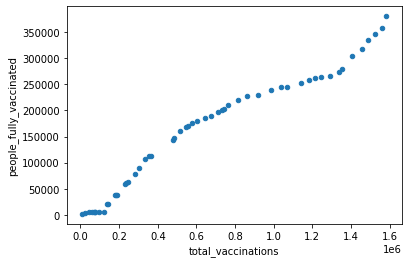

In [85]:
# Diagrama de dispersión entre total_vaccinations y people_fully_vaccinated:
dataEc.plot(kind='scatter', x='total_vaccinations', y='people_fully_vaccinated')
# A mayor numero de vacunas, mayor numero de personas vacunadas completamente 

<AxesSubplot:>

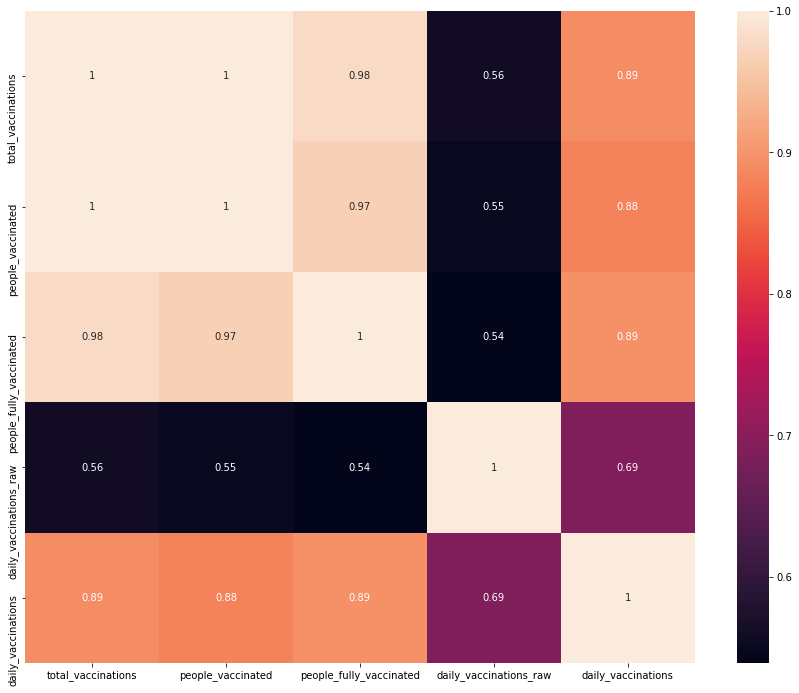

In [86]:
plt.rcParams['figure.figsize'] = (15.0, 12.0)

sns.heatmap(dataEc.corr(), annot = True) 

## Crear nuevo csv

In [87]:
filteredNew = dataEc[dataEc["date"].isin(pd.date_range('2021-05-02', '2021-05-20'))]
filteredNew

,country,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,vaccines,source_name
4855,Ecuador,2021-05-02,1067472.0,821960.0,245512.0,30678.0,46219.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac",Government of Ecuador via Ecuacovid
4856,Ecuador,2021-05-03,NaN,NaN,NaN,NaN,48411.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac",Government of Ecuador via Ecuacovid
4857,Ecuador,2021-05-04,1141262.0,889218.0,252044.0,NaN,46441.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac",Government of Ecuador via Ecuacovid
4858,Ecuador,2021-05-05,1182085.0,924539.0,257546.0,40823.0,45813.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac",Government of Ecuador via Ecuacovid
4859,Ecuador,2021-05-06,1215676.0,953238.0,262438.0,33591.0,42116.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac",Government of Ecuador via Ecuacovid
4860,Ecuador,2021-05-07,1245822.0,981620.0,264202.0,30146.0,36910.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac",Government of Ecuador via Ecuacovid
4861,Ecuador,2021-05-08,NaN,NaN,NaN,NaN,33014.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac",Government of Ecuador via Ecuacovid
4862,Ecuador,2021-05-09,1289962.0,1024121.0,265841.0,NaN,31784.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac",Government of Ecuador via Ecuacovid
4863,Ecuador,2021-05-10,NaN,NaN,NaN,NaN,30030.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac",Government of Ecuador via Ecuacovid
4864,Ecuador,2021-05-11,1339196.0,1066590.0,272606.0,NaN,28276.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac",Government of Ecuador via Ecuacovid


In [88]:
filteredNew.to_csv('data/datosKaggle.csv', header=True, index=False)